In [1]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

/opt/conda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/opt/conda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/opt/conda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/opt/conda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/opt/conda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/opt/conda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/opt/conda/lib/python3.8/site-packages/numpy/l

MAE: 18.931192249156364
STD: 13.886996890845678


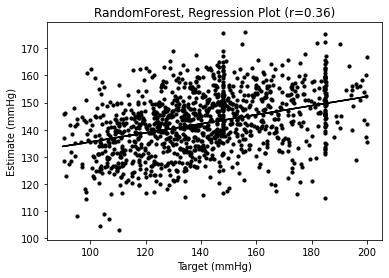

In [12]:
Filename='./BPPPG/features.csv'
benchmark_name = 'Hasanzadeh_2019'

# BP = 'dia'
BP = 'sys'

if BP=='sys':
    target = 4
if BP=='dia':
    target = 5

# Reading extracted features file    
df = pd.read_csv(Filename,error_bad_lines=False,header=None)
# Fill NANs with Means of columns
df.replace([np.inf, -np.inf],np.nan, inplace=True)
df.fillna(df.mean(),inplace=True)
df = df.reset_index(drop=True)

df.drop(df[df[4] < 90].index, inplace=True)
df.drop(df[df[5] < 40].index, inplace=True)
df.drop(df[df[10] < 50].index, inplace=True)

df.drop(df[df[4] > 200].index, inplace=True)
df.drop(df[df[5] > 100].index, inplace=True)
df.drop(df[df[10] > 140].index, inplace=True)

k_fold = 10
fold_size = int(len(df)/k_fold)
err = []
results = []
reals = []
allerrs = []

models = [RandomForestRegressor(n_jobs=4,n_estimators=100), 
#           AdaBoostRegressor(n_estimators=200),
#           LinearRegression(n_jobs=4),
#           DecisionTreeRegressor()
         ]
model_names = ['RandomForest', 'AdaBoost', 'Linear', 'DecisionTree']

for m in range(len(models)):
    for i in range(0,k_fold):
        trainData = df.loc[0:i * fold_size]
        trainData = trainData.append(df.loc[(i+1) * fold_size:])  
        testData = df.loc[i * fold_size:(i+1) * fold_size]
        trainData = trainData[[ss for ss in range(0,np.shape(trainData)[1]-1) if (ss not in [0,1,2,3,6,7,8,9,10] or ss== target)]]
        testData = testData[[ss for ss in range(0,np.shape(testData)[1]-1) if (ss not in [0,1,2,3,6,7,8,9,10] or ss == target)]]  

        trainFeatures = np.array(trainData[[ss for ss in range(11,np.shape(trainData)[1]-1) if ss not in [target]]]).astype(np.float32)

        trainFeatures[trainFeatures == np.inf] = 0
        trainLabels = np.array(trainData[target]).astype(np.float32)

        testFeatures = np.array(testData[[ss for ss in range(11,np.shape(testData)[1]-1) if ss not in [target]]]).astype(np.float32)
        testFeatures[testFeatures == np.inf] = 0
        testLabels = np.array(testData[target]).astype(np.float32)

        scaler = preprocessing.StandardScaler().fit(trainFeatures)
        trainFeatures = scaler.transform(trainFeatures) 
        testFeatures = scaler.transform(testFeatures)    

        model = models[m]
        model.fit(trainFeatures,trainLabels)
        result = model.predict(testFeatures) 
        reals.extend(testLabels)
        results.extend(result)

        err.append([i, np.mean(np.mean(np.abs(np.array(result) - np.array(testLabels))))])    
        allerrs.extend(np.abs(np.array(result) - np.array(testLabels)))
    errs = [e[1] for e in err]
    print('MAE: {}'.format(np.mean(allerrs)))
    print('STD: {}'.format(np.std(allerrs)))

    alldata_real = np.array(reals)
    alldata_result = np.array(results)
    #
    corrcoef = np.corrcoef(alldata_real,alldata_result)[1][0]       
    errsDetails = (np.mean(np.abs(alldata_result-alldata_real)),np.std(np.abs(alldata_result-alldata_real)))
    samples = random.sample(range(len(alldata_real)), int(len(alldata_real)/10))
    s45 = random.sample(range(len(alldata_real)), len(alldata_real))
    fit = np.polyfit(alldata_real,alldata_result,1)
    fit_fn = np.poly1d(fit) 
    plt.figure()    
    plt.scatter(alldata_real[[i for i in samples]],alldata_result[[i for i in samples]],s=10,c='k')
    plt.plot(alldata_real, fit_fn(alldata_real), '-k')
    plt.title(model_names[m] + ', Regression Plot (r={})'.format(np.round(corrcoef,2)))
    plt.xlabel('Target (mmHg)')
    plt.ylabel('Estimate (mmHg)')
    plt.savefig(model_names[m] + '_' + BP + '_' + model_names[m] + '.png')

In [8]:
Filename='./BPPPG/features.csv'
len(pd.read_csv(Filename))

11960

In [9]:
Filename='./BPPPG/features_original.csv'
len(pd.read_csv(Filename))

10247